<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

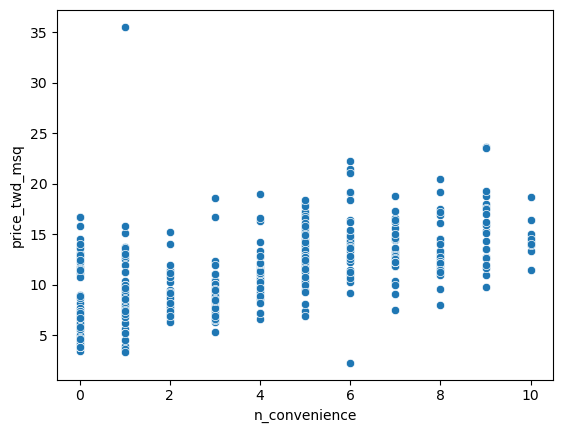

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
taiwan_real_estate = pd.read_csv('Taiwan_real_estate2.csv')
sns.scatterplot(x = 'n_convenience', y = 'price_twd_msq', data = taiwan_real_estate)

<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

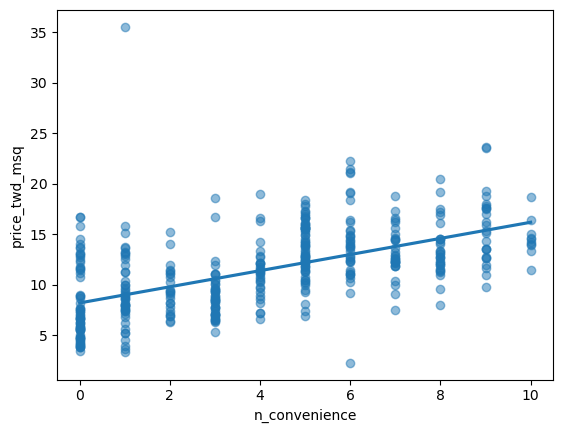

In [90]:
sns.regplot(x = 'n_convenience', y = 'price_twd_msq', data = taiwan_real_estate, ci= None, scatter_kws = {'alpha':0.5})

In [91]:
from statsmodels.formula.api import ols
swedish_motor_insurance = pd.read_csv('swedish_motor_insurance.csv')
mdl_payment_vs_claims = ols('total_payment_sek ~ n_claims', data = swedish_motor_insurance)
mdl_payment_vs_claims = mdl_payment_vs_claims.fit()
print(mdl_payment_vs_claims.params)

Intercept    19.994486
n_claims      3.413824
dtype: float64


In [92]:
# Import the ols function
from statsmodels.formula.api import ols

taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)


Intercept        8.224237
n_convenience    0.798080
dtype: float64


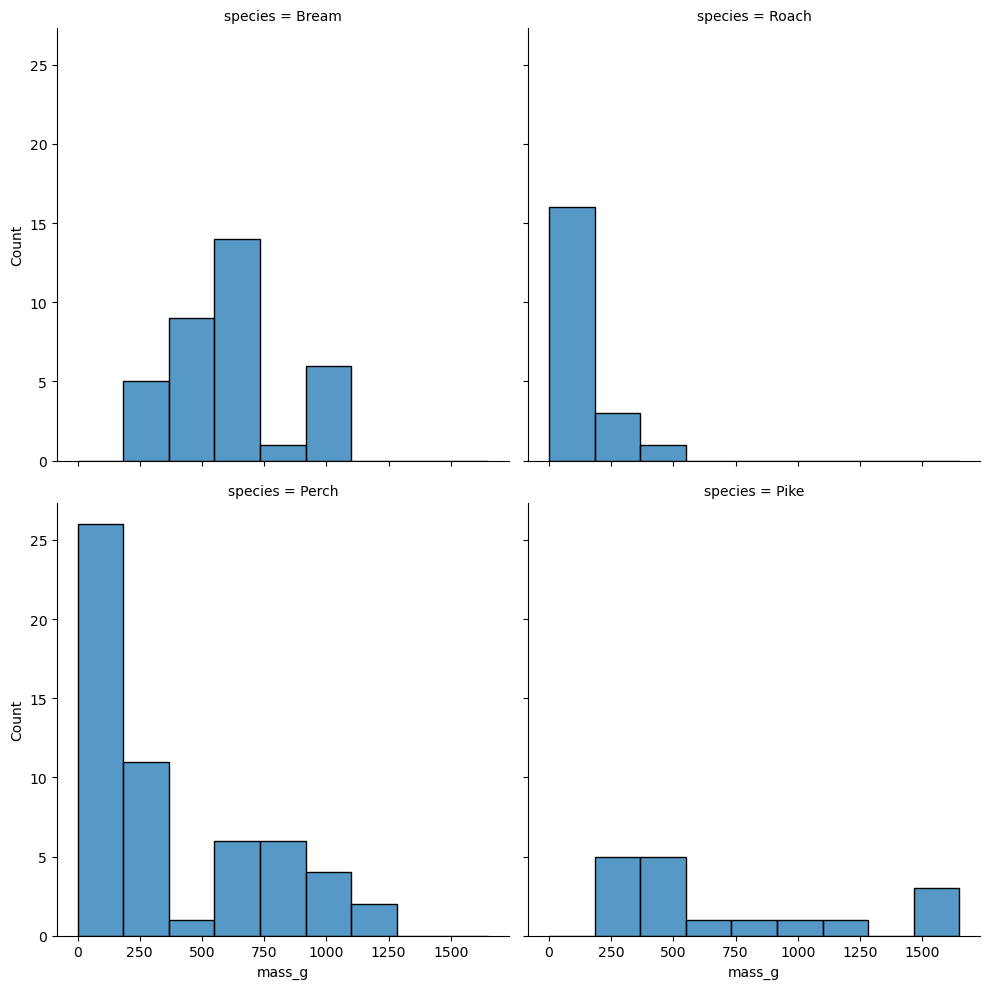

In [93]:
#Categorial explanatory variables - Fish data set
fish = pd.read_csv('fish.csv')
sns.displot(data = fish, x = 'mass_g', col = 'species', col_wrap = 2, bins = 9)
plt.show()


In [94]:
summary_stats = fish.groupby('species')['mass_g'].mean()
print(summary_stats)


species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64


In [95]:
mdl_mass_vs_species = ols('mass_g ~ species + 0', data = fish).fit()
print(mdl_mass_vs_species.params)


species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


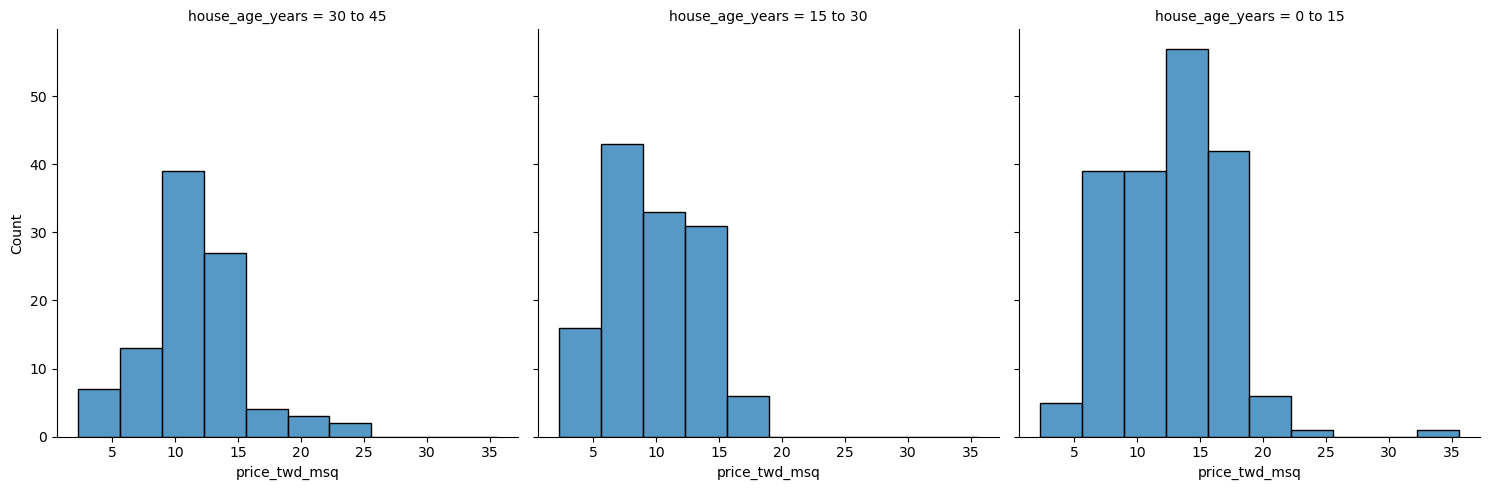

In [96]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         bins=10)

# Show the plot
plt.show()


In [97]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)


Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [98]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)


house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


  species  mass_g  length_cm
0   Bream   242.0       23.2
1   Bream   290.0       24.0
2   Bream   340.0       23.9
3   Bream   363.0       26.3
4   Bream   430.0       26.5


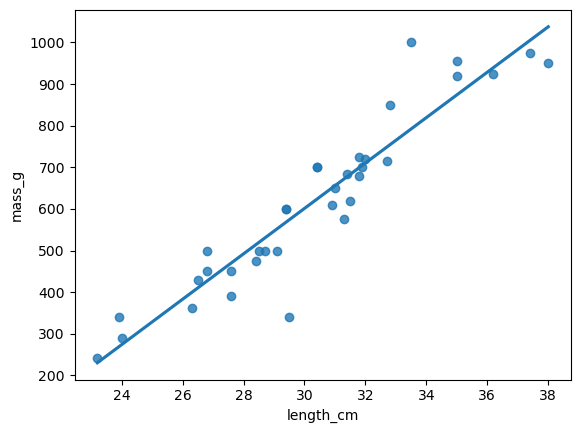

In [99]:
bream = fish[fish['species'] == 'Bream']
print(bream.head())

sns.regplot(x='length_cm', y='mass_g', data=bream, ci=None)
plt.show()


In [100]:
mdl_mass_vs_length = ols('mass_g ~ length_cm', data = bream).fit()
print(mdl_mass_vs_length.params)


Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [101]:
import numpy as np
explanatory_data = pd.DataFrame({'length_cm':np.arange(20,41)})
prediction_data = explanatory_data.assign(mass_g = mdl_mass_vs_length.predict(explanatory_data))
print(prediction_data)


    length_cm       mass_g
0          20    55.652054
1          21   110.202035
2          22   164.752015
3          23   219.301996
4          24   273.851977
5          25   328.401958
6          26   382.951939
7          27   437.501920
8          28   492.051901
9          29   546.601882
10         30   601.151863
11         31   655.701844
12         32   710.251825
13         33   764.801806
14         34   819.351787
15         35   873.901768
16         36   928.451749
17         37   983.001730
18         38  1037.551710
19         39  1092.101691
20         40  1146.651672


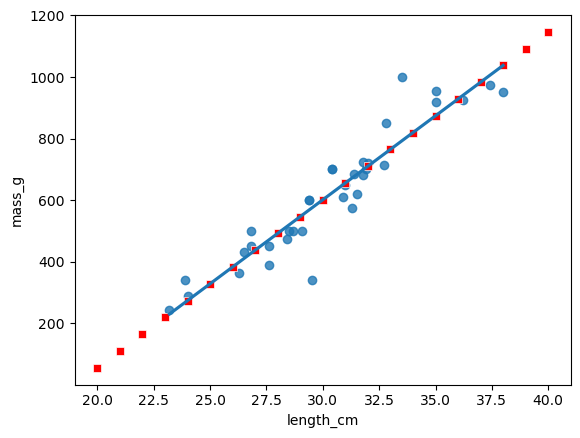

In [102]:
fig = plt.figure
sns.regplot(x='length_cm', y='mass_g', ci=None, data=bream)
sns.scatterplot(x='length_cm', y='mass_g',data=prediction_data, color='red', marker='s')
plt.show()


In [103]:
# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

#print(explanatory_data)

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

#print(price_twd_msq)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)


    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


In [104]:
coeffs = mdl_price_vs_conv.params
intercept = coeffs[0]   # intercept = coeffs.iloc[0]
slope = coeffs[1] # slope = coeffs.iloc[1] 

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)



    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035


C:\Users\LOQ\AppData\Local\Temp\ipykernel_23112\3533273412.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coeffs[0]   # intercept = coeffs.iloc[0]
C:\Users\LOQ\AppData\Local\Temp\ipykernel_23112\3533273412.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = coeffs[1] # slope = coeffs.iloc[1]


In [105]:
# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)


    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


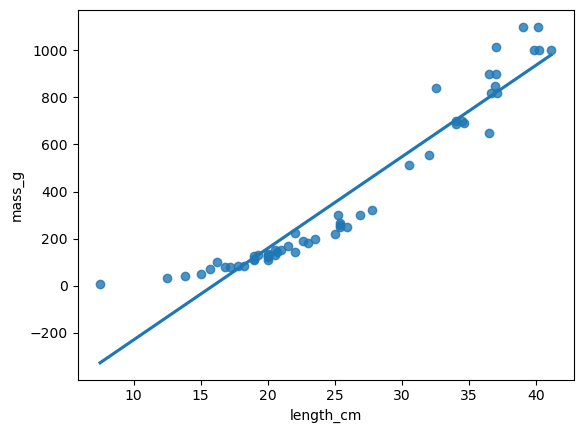

In [106]:
perch = fish[fish['species']=='Perch']
sns.regplot(x='length_cm', y='mass_g', data=perch,ci=None)
plt.show()


In [107]:
perch['length_cm_cubed'] = perch['length_cm'] ** 3
mdl_perch = ols('mass_g ~ length_cm_cubed', data=perch).fit()
mdl_perch.params


C:\Users\LOQ\AppData\Local\Temp\ipykernel_23112\1637856579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch['length_cm_cubed'] = perch['length_cm'] ** 3


Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64

In [108]:
explanatory_data = pd.DataFrame({'length_cm_cubed':np.arange(10,41,5)**3, 'length_cm':np.arange(10,41,5)})

prediction_data = explanatory_data.assign(mass_g = mdl_perch.predict(explanatory_data))
print(prediction_data)


   length_cm_cubed  length_cm       mass_g
0             1000         10    16.678135
1             3375         15    56.567717
2             8000         20   134.247429
3            15625         25   262.313982
4            27000         30   453.364084
5            42875         35   719.994447
6            64000         40  1074.801781


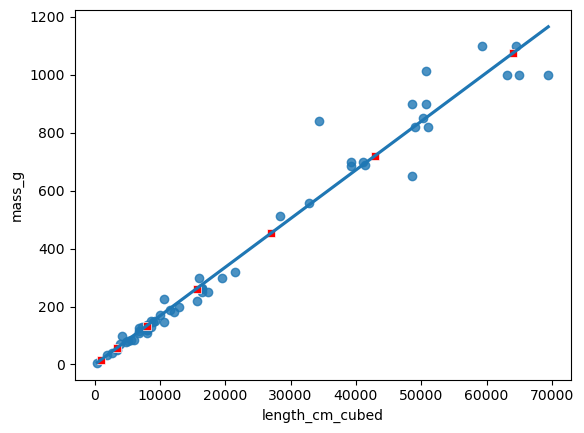

In [109]:
fig = plt.figure()
sns.regplot(x='length_cm_cubed', y='mass_g',data=perch,ci=None)
sns.scatterplot(data=prediction_data, x='length_cm_cubed', y='mass_g', color='red', marker='s')
plt.show()


   species  mass_g  length_cm
55   Perch     5.9        7.5
56   Perch    32.0       12.5
57   Perch    40.0       13.8
58   Perch    51.5       15.0
59   Perch    70.0       15.7


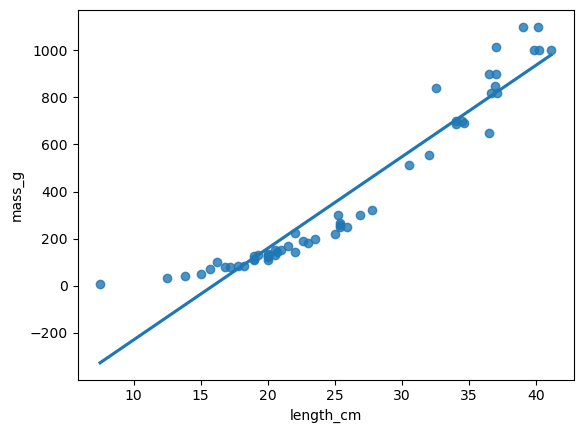

C:\Users\LOQ\AppData\Local\Temp\ipykernel_23112\1460928559.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch['length_cm_cubed'] = perch['length_cm']**3


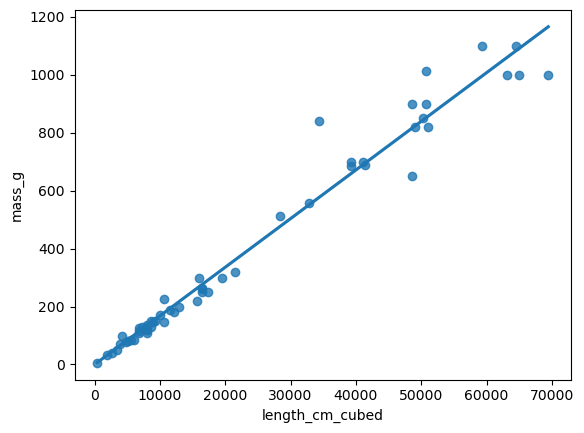

Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64
   length_cm_cubed  length_cm       mass_g
0             1000         10    16.678135
1             3375         15    56.567717
2             8000         20   134.247429
3            15625         25   262.313982
4            27000         30   453.364084
5            42875         35   719.994447
6            64000         40  1074.801781


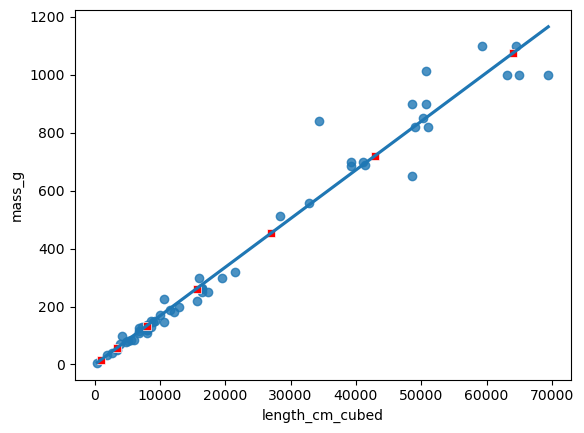

In [110]:
perch = fish[fish['species'] == 'Perch']
print(perch.head())

sns.regplot(x='length_cm', y = 'mass_g', data = perch, ci=None)
plt.show()

perch['length_cm_cubed'] = perch['length_cm']**3
sns.regplot(x='length_cm_cubed', y = 'mass_g', data = perch, ci=None)
plt.show()

mdl_perch = ols('mass_g ~ length_cm_cubed', data=perch).fit()
print(mdl_perch.params)

explanatory_data = pd.DataFrame({'length_cm_cubed': np.arange(10,41,5)**3,
                               'length_cm': np.arange(10,41,5)})
prediction_data = explanatory_data.assign(mass_g=mdl_perch.predict(explanatory_data))
print(prediction_data)

fig = plt.figure()
sns.regplot(x='length_cm_cubed', y = 'mass_g', data = perch, ci=None)
sns.scatterplot(data=prediction_data, x = 'length_cm_cubed', y = 'mass_g', color='red', marker='s')
plt.show()


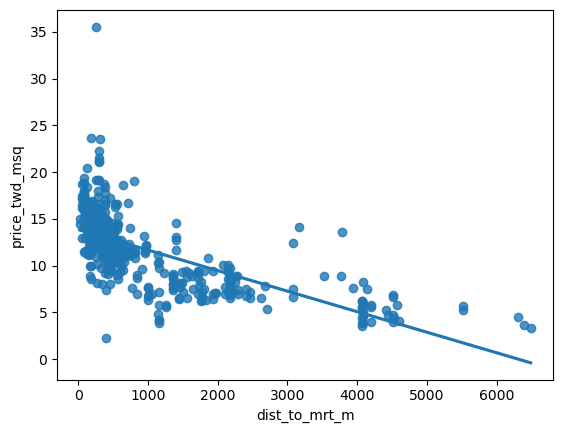

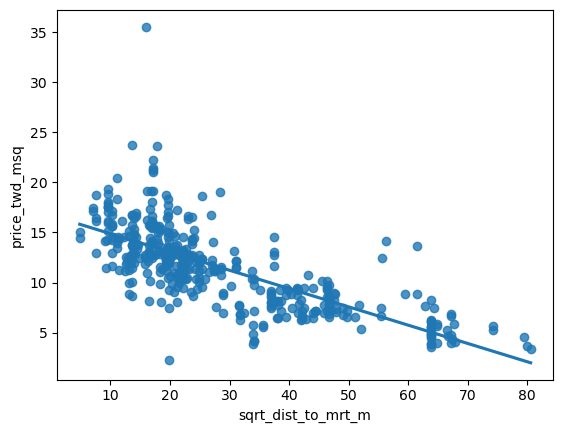

In [111]:
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
plt.show()

# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
plt.show()


In [112]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)


Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [113]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)


   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


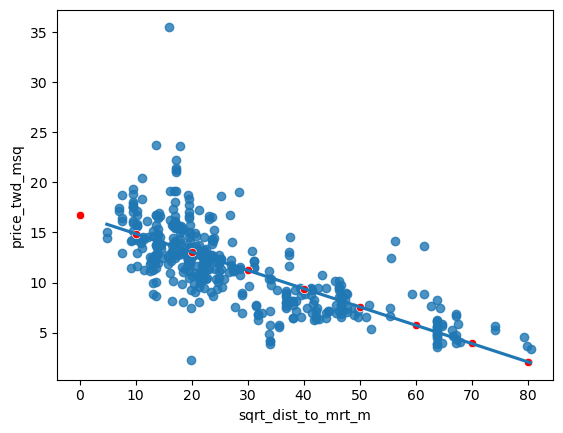

In [114]:
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()


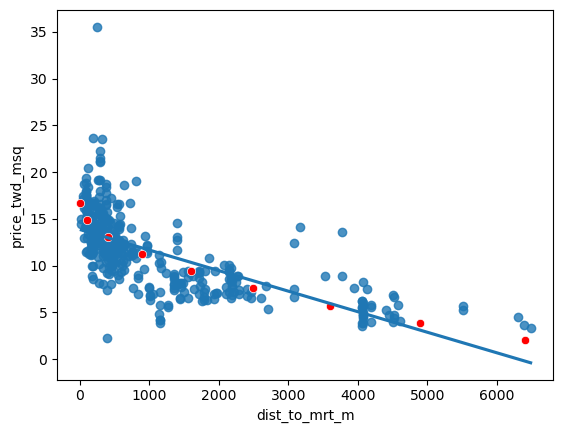

In [115]:
fig = plt.figure()
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()


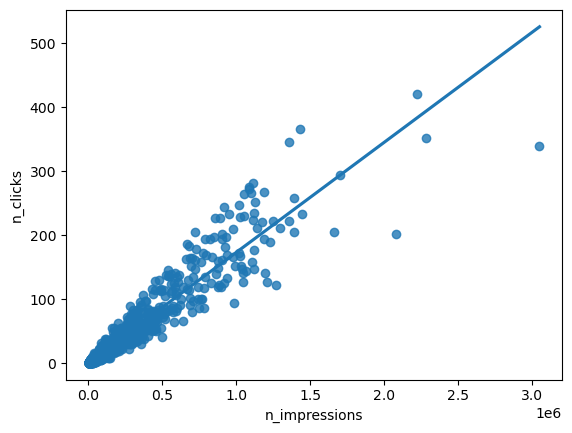

In [116]:
# Load the ad conversion dataset
ad_conversion = pd.read_csv('ad_conversion.csv')

# Look at the scatter plot of n_impressions vs n_clicks
sns.regplot(x='n_impressions', y='n_clicks', data=ad_conversion, ci=None)
plt.show()

In [117]:
# Create qdrt_n_impressions column (fourth root transformation)
ad_conversion['qdrt_n_impressions'] = ad_conversion['n_impressions'] ** 0.25

# Create qdrt_n_clicks column (fourth root transformation)
ad_conversion['qdrt_n_clicks'] = ad_conversion['n_clicks'] ** 0.25

print(ad_conversion.head())

   spent_usd  n_impressions  n_clicks  qdrt_n_impressions  qdrt_n_clicks
0       1.43           7350         1            9.259165       1.000000
1       1.82          17861         2           11.560495       1.189207
2       1.25           4259         1            8.078429       1.000000
3       1.29           4133         1            8.018006       1.000000
4       4.77          15615         3           11.178551       1.316074


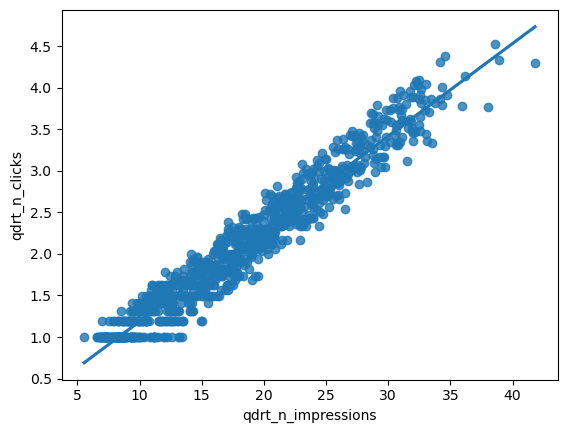

In [118]:
# Create regression plot using the transformed variables
sns.regplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=ad_conversion, ci=None)
plt.show()

# The points should track the line more closely after transformation

In [119]:
# Run a linear regression of qdrt_n_clicks versus qdrt_n_impressions
mdl_click_vs_impression = ols('qdrt_n_clicks ~ qdrt_n_impressions', data=ad_conversion).fit()

# Print the model parameters
print(mdl_click_vs_impression.params)

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64


In [120]:
# Create explanatory data for predictions
# qdrt_n_impressions: range 0 to 3000000, step 500000, raised to power 0.25
# n_impressions: as reference (no transformation)
explanatory_data = pd.DataFrame({
    'qdrt_n_impressions': np.arange(0, 3000001, 500000) ** 0.25,
    'n_impressions': np.arange(0, 3000001, 500000)
})

print(explanatory_data)

   qdrt_n_impressions  n_impressions
0            0.000000              0
1           26.591479         500000
2           31.622777        1000000
3           34.996355        1500000
4           37.606031        2000000
5           39.763536        2500000
6           41.617915        3000000


In [121]:
# Predict qdrt_n_clicks and create prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the prediction data
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000              0       0.071748
1           26.591479         500000       3.037576
2           31.622777        1000000       3.598732
3           34.996355        1500000       3.974998
4           37.606031        2000000       4.266063
5           39.763536        2500000       4.506696
6           41.617915        3000000       4.713520


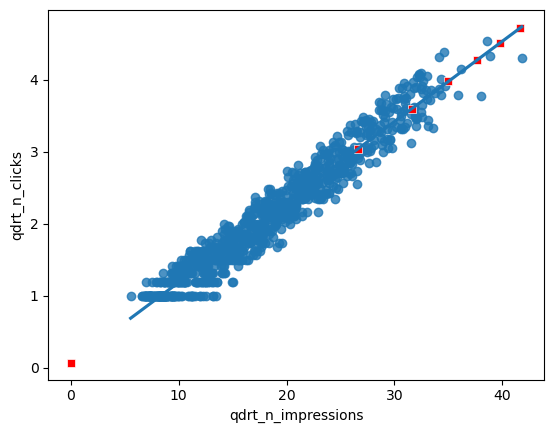

In [122]:
# Create scatter plot with regression line using transformed variables
fig = plt.figure()
sns.regplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=ad_conversion, ci=None)

# Add a layer of prediction points
sns.scatterplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=prediction_data, color='red', marker='s')
plt.show()

In [123]:
# Back-transform: create n_clicks by raising qdrt_n_clicks to the power of 4
prediction_data['n_clicks'] = prediction_data['qdrt_n_clicks'] ** 4

# Print the back-transformed prediction data
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000              0       0.071748    0.000026
1           26.591479         500000       3.037576   85.135121
2           31.622777        1000000       3.598732  167.725102
3           34.996355        1500000       3.974998  249.659131
4           37.606031        2000000       4.266063  331.214159
5           39.763536        2500000       4.506696  412.508546
6           41.617915        3000000       4.713520  493.607180


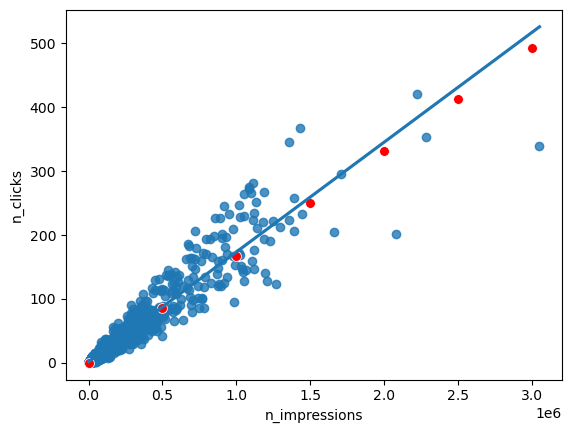

In [124]:
# Plot on original scale with back-transformed predictions
fig = plt.figure()
sns.regplot(x='n_impressions', y='n_clicks', data=ad_conversion, ci=None)

# Add a layer of back-transformed prediction points in red
sns.scatterplot(x='n_impressions', y='n_clicks', data=prediction_data, color='red', marker='o', s=50)
plt.show()

In [125]:
# Get model summary to assess goodness of fit
print(mdl_click_vs_impression.summary())

# Extract R-squared
r_squared = mdl_click_vs_impression.rsquared

# Extract RSE (Residual Standard Error)
# RSE is the square root of the mean squared error
rse = np.sqrt(mdl_click_vs_impression.mse_resid)

print("\n--- Interpretation ---")
print(f"R-squared: {r_squared}")
print(f"RSE: {rse}")
print("Back-transformed errors vary with click magnitude")

                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Wed, 28 Jan 2026   Prob (F-statistic):               0.00
Time:                        20:35:38   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0